# Linear Regression

Explore and implement a simple linear regression model using `scikit-learn` to predict a dependent variable based on an independent variable.

## Part 1: Linear Regression Walkthrough
We will use a synthetic dataset generated for the purpose of this exercise, representing the relationship between hours studied (independent variable) and exam scores (dependent variable).

### Step 1: Import Necessary Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

### Step 2: Generate Dataset

In [4]:
# Generate synthetic data: hours studied vs exam score
np.random.seed(0)  # For reproducibility
hours_studied = np.random.rand(100, 1) * 10  # Random values in a 10-hour range
exam_scores = 2 * hours_studied + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Convert to a DataFrame for easier handling
data = pd.DataFrame({'Hours Studied': hours_studied.flatten(), 'Exam Score': exam_scores.flatten()})
data

,Hours Studied,Exam Score
0,5.488135,8.645970
1,7.151894,16.105440
2,6.027634,12.986592
3,5.448832,7.825176
4,4.236548,11.449600
...,...,...
95,1.831914,5.027016
96,5.865129,10.123439
97,0.201075,-0.976949
98,8.289400,15.667736


### Step 3: Visualize Data

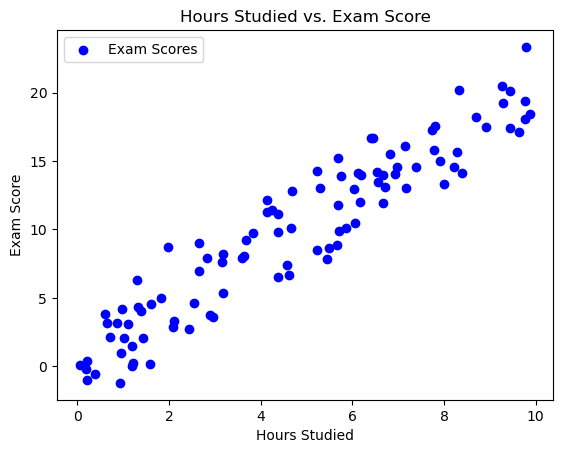

In [5]:
plt.scatter(data['Hours Studied'], data['Exam Score'], color='blue', label='Exam Scores')
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

What do you infer from the visualized data?

The visualization shows a positive correlation between **Hours Studied** and **Exam Score**. It means that the **Exam Score** tends to increase as the **Hours Studied** increases.

### Step 4: Prepare Data

In [6]:
# Split the dataset
X = data[['Hours Studied']]
y = data['Exam Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Why do we split data? How do you decide the portions for train and test sets?

We split the data into train and test sets to help us evaluate the performance of a model. Training a model with one subset of data and testing it on another subset simulate its performance on unseen data. It also prevents overfitting from occuring.

The portions for train and test sets depends on the number of records in the dataset and the training/validation methodology used.However, the most commonly used ratio is 80/20, often referred to as the Pareto principle which states that "for many outcomes, roughly 80% of consequences, come from 20% of causes".

Although, in a research conducted by Guyon published in 1996, he stated that the "fraction of patterns reserved for the validation set should be inversely proportional to the square root of the number of free adjustable parameters". With that rule, if one has for example 32 adjustable parameters, the square root of 32 is approximately 5.65. The fraction should be 1/5.65 = 0.177 which means that roughly 17.7% of the data should be reserved for validation and the rest, 82.3% for training.

**References**
* Stackoverflow (2012) *Is there a rule-of-thumb for how to divide a dataset into training and validation sets?* Available at: https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio
* Wikipedia (2024) *Toggle the table of contents Pareto principle.* Available at: https://en.wikipedia.org/wiki/Pareto_principle


### Step 5: Create and Train Model

In [7]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

LinearRegression()

### Step 6: Model Evaluation

In [8]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 1.60
R-squared: 0.85


### Step 7: Make Predictions

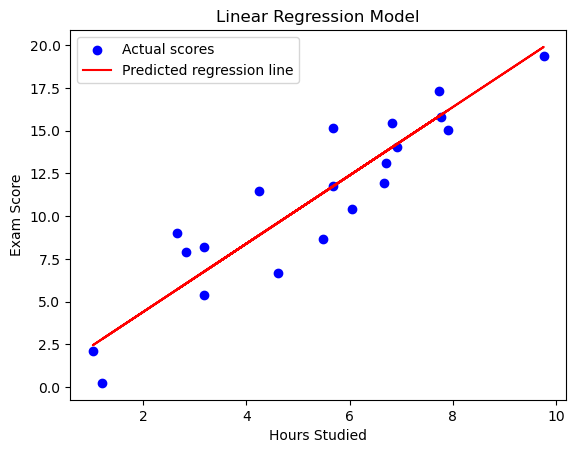

In [9]:
# Visualization of the model predictions
plt.scatter(X_test, y_test, color='blue', label='Actual scores')
plt.plot(X_test, y_pred, color='red', label='Predicted regression line')
plt.title('Linear Regression Model')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

Discuss about your findings.

The model evaluation returned a Mean Absolute Error (MAE) of 1.60, so the model's predictions are off by around 1.60 units. A lower value of MAE would have indicated a better performance. 
The model evaluation also returned an R-squared of 0.85. With R-squared, the closer to 1 the value is, the better the performance. In this case the value 0.85 indicates a relatively good fit.

The above linear regression model shows a red line with a positive slop. The data points are scattered around the red line. Although some predictions were higher or lower than the predicted **Exam Score** for the same number of **Hours Studied**.

## Part 2: Implement a Regression Model

Apply your understanding of linear regression to a new dataset to predict `y` based on `x`. Find and use any dataset of your choice to complete this task.

### Task 1: Implement the Regression Model

In this next example, we will use a Salary dataset from [Kaggle](https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression). We will use the variable **YearsExperience** as the independent variable and the variable **Salary** as the dependent variable. We will assume that the **Salary** variable is in dollars.

### Step 1: Get the dataset

In [93]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Step 2: Visualize the data

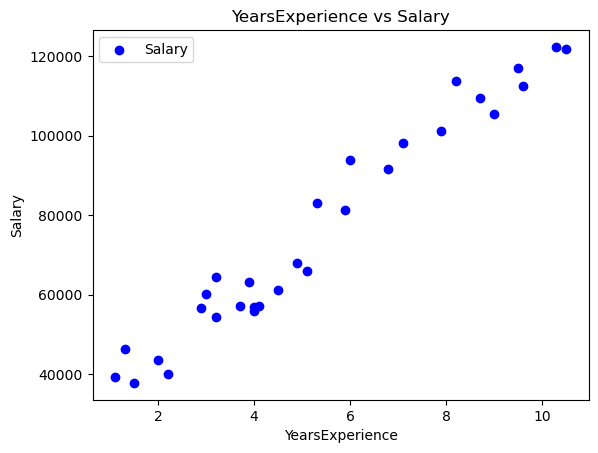

In [94]:
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Salary')
plt.title('YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In the visualization above, we notice a positive correlation between **YearsExperience** and **Salary**, the **Salary** increases as the **YearsExperience** increases.

### Step 3: Prepare the data into train and test sets

In [95]:
# Split the dataset
X = df[["YearsExperience"]]
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We have increased the percentage of testing sample because the dataset is small.

### Step 4: Create and train the model

In [96]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 5: Model Evaluation

In [99]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 5161.33
R-squared: 0.94


The MAE of 5161.33 indicates that the salary prediction of the model is $5161.33 away from the actual salary values. 
The R-squared value of 0.94 indicates a good fit as it is closer to 1.

### Step 6 Visualize predictions

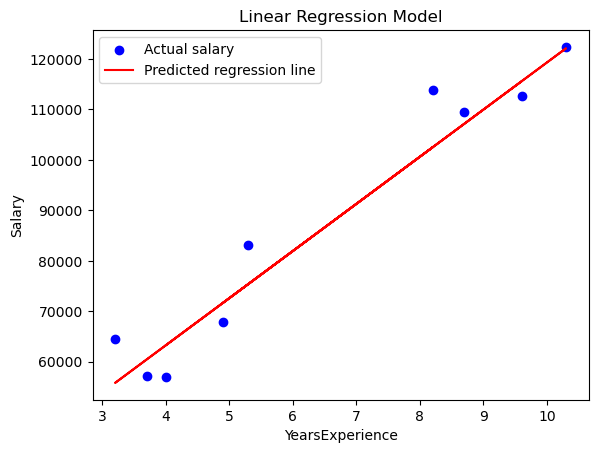

In [98]:
# Visualization of the model predictions
plt.scatter(X_test, y_test, color='blue', label='Actual salary')
plt.plot(X_test, y_pred, color='red', label='Predicted regression line')
plt.title('Linear Regression Model')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

The blue dots are somewhat close to the regression line, which suggests that the model's predictions are relatively accurate.

### Implementation

In this dataset, we have chosen a dataset from Kaggle that has observations of **Salary** against **YearsExperience**. By plotting the data, we have noticed a positive correlation between the two variables suggesting that the **Salary** increases as **YearsExperience** increases. We split the data into training (70%) and testing (30%), and created and trained a regression model. We chose this ratio because the data does not have many observations. The model evaluation returned an R-squared value of 0.94 which is generally considered a very good fit. Then, we plotted the actual salary against the predicted regression line, which suggested that the model's predictions were relatively accurate.